<a href="https://colab.research.google.com/github/tech-dhawal-03/Data-Mining-Projects/blob/main/Opinion_Mining_for_Social_Networking_Site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes Report:
               precision    recall  f1-score   support

    Negative       0.70      0.82      0.75      4427
     Neutral       0.75      0.55      0.63      3678
    Positive       0.71      0.75      0.73      4120

    accuracy                           0.71     12225
   macro avg       0.72      0.71      0.71     12225
weighted avg       0.72      0.71      0.71     12225

Logistic Regression Report:
               precision    recall  f1-score   support

    Negative       0.79      0.80      0.79      4427
     Neutral       0.70      0.69      0.70      3678
    Positive       0.76      0.76      0.76      4120

    accuracy                           0.75     12225
   macro avg       0.75      0.75      0.75     12225
weighted avg       0.75      0.75      0.75     12225



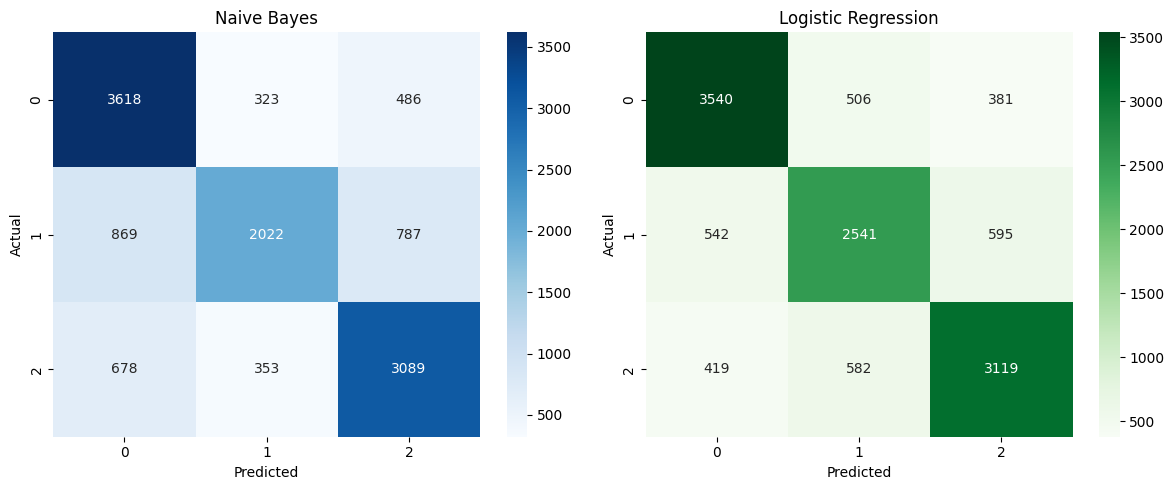

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset with no header
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])

# Drop missing values
df.dropna(subset=['Text', 'Sentiment'], inplace=True)

# Optional: filter only common sentiments
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

# Preprocess text
df['Text'] = df['Text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)

# Print reports
print("Naive Bayes Report:\n", classification_report(y_test, nb_preds))
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))

# Confusion matrix plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('Naive Bayes')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title('Logistic Regression')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
